In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch as pt
import numpy as np
from tqdm import tqdm

tqdm.pandas()


In [2]:
from allocineutil import get_rating_class, get_rating_value,get_3class_rating


In [3]:
train = pd.read_pickle("dataset/train.bin.zst")
test = pd.read_pickle("dataset/test.bin.zst")
dev = pd.read_pickle("dataset/dev.bin.zst")

In [4]:
test

movie              name                   user_id  \
review_id                                                       
59354742   253727  gimliamideselfes  Z20040827093310567684711   
62570109   253727            Yetcha  Z20030318104639813779116   
58180650   253727          TTNOUGAT  Z20071021153249553451578   
57696986   253727       titicaca120  Z20060317115155370578365   
57736972   253727           velocio  Z20040630141522227308769   
...           ...               ...                       ...   
57275608   223252             Rom A  Z20120217154308300922168   
57288594   223252            Zoé T.  Z20171104180909770373557   
57313027   223252           Elisa G  Z20121226181848567456295   
57321607   223252     Kevin Quesnel  Z20111024122936830511478   
57331968   223252        AskingGame  Z20171110011506700667194   

                                                 commentaire  
review_id                                                     
59354742   12 jours, un film que j'ai raté à sa sortie et...  
62570109   Ces lueurs dans ces yeux... Soit ils sont tous...  
58180650   Il s’agit d’un documentaire sans la moindre ac...  
57696986   un documentaire magnifique dans cette unité ly...  
57736972   Un documentaire très intéressant, quand bien m...  
...                                                      ...  
57275608   UnThor aux cheveux courts, un Hulk qui parle, ...  
57288594   Le casting correspond bien au film mais ça doi...  
57313027   Très bon film. Bon effets spéciaux. Il manquai...  
57321607   le film est superbe ! avec pas mal d'action co...  
57331968   Il s'agit là du plus fun et décomplexer de tou...  

[85847 rows x 4 columns]

In [5]:
from transformers import CamembertTokenizerFast
tokenizer = CamembertTokenizerFast.from_pretrained("camembert-base")

In [6]:
# import emoji

In [7]:
# 
# tokenizer.encode(emoji.demojize("😀"))

In [8]:
# tqdm.pandas()


In [9]:

# train["tokens"] = train["commentaire"].progress_apply(lambda text: \
#     tokenizer.encode(text, add_special_tokens=True))

In [10]:
from argparse import ArgumentParser
from model import AllocinePredictor
# import pandas as pd

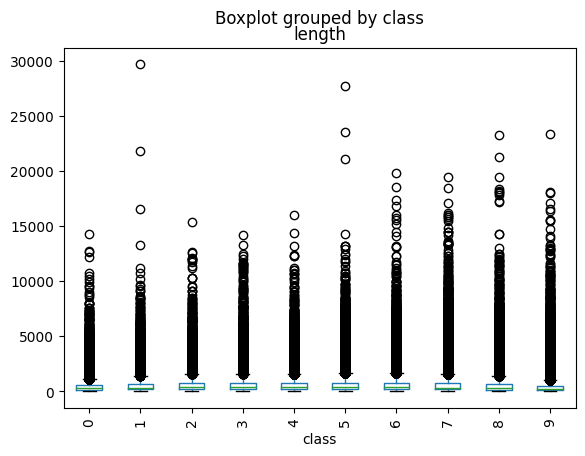

In [11]:
# make a violin plot of the distribution of the ratings
# plt.violinplot(train["note"].values)
# plt.show()

#make a violon plot of lengt of commentaire againt class rating
def plot_length_class(df):

    df["length"] = df["commentaire"].apply(lambda x: len(x))
    df["class"] = df["note"].apply(lambda x: get_rating_class(x))
    df.boxplot(column="length", by="class", grid=False, rot=90) 


plot_length_class(train)

In [12]:

#generate a violinplot of length of commentaire againt class rating
# def violin_length_class(df):
#     fig, axes = plt.subplots()

#     # df["length"] = df["commentaire"].apply(lambda x: len(x))
#     df["tokens"] = df["commentaire"].progress_apply(lambda text: tokenizer.encode(text, add_special_tokens=True))
#     df["length"] = df["tokens"].apply(len)
#     df.drop(df[df['length'] >= 2500].index, inplace = True)
#     df["class"] = df["note"].apply(lambda x: get_rating_class(x))
    
#     axes.violinplot(dataset = [df[df["class"] ==0]["length"] .values,
#                                 df[df["class"] ==1]["length"] .values,
#                                 df[df["class"] ==2 ]["length"] .values,
#                                 df[df["class"] ==3]["length"] .values,
#                                 df[df["class"] ==4]["length"] .values,
#                                 df[df["class"] ==5]["length"] .values,
#                                 df[df["class"] ==6]["length"] .values,
#                                 df[df["class"] ==7]["length"] .values,
#                                 df[df["class"] ==8]["length"] .values,
#                                 df[df["class"] ==9]["length"] .values
#                             ]  )

#     # axes.set_title('Day Ahead Market')
#     axes.yaxis.grid(True)
#     # axes.set_ymax(2500)
#     axes.set_xlabel('Rating')
#     axes.set_ylabel('Size of the comments')
#     plt.show

# #  Violin Plot
# # plot_length_class(train)
# violin_length_class(train)
# # train[train["class"] ==0]

  8%|▊         | 50158/665962 [00:55<13:44, 747.19it/s] 

In [ ]:

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Rating')


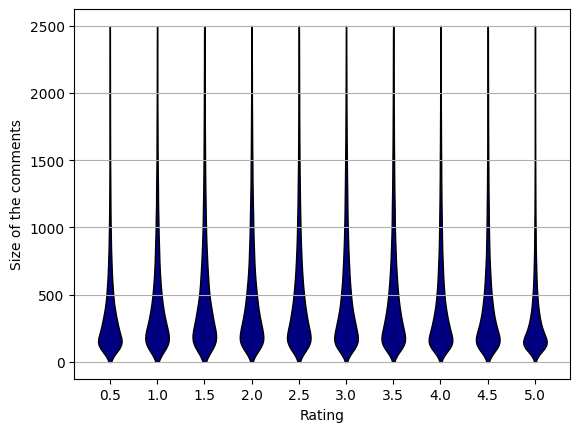

In [ ]:

#generate a violinplot of length of commentaire againt class rating
def violin_length_class(df):
    fig, axes = plt.subplots()

    df["length"] = df["commentaire"].apply(lambda x: len(x))
    # df["tokens"] = df["commentaire"].progress_apply(lambda text: tokenizer.encode(text, add_special_tokens=True))
    # df["length"] = df["tokens"].apply(len)
    df.drop(df[df['length'] >= 2500].index, inplace = True)
    df["class"] = df["note"].apply(lambda x: get_rating_class(x))
    
    part = axes.violinplot(dataset = [df[df["class"] ==0]["length"] .values,
                                df[df["class"] ==1]["length"] .values,
                                df[df["class"] ==2 ]["length"] .values,
                                df[df["class"] ==3]["length"] .values,
                                df[df["class"] ==4]["length"] .values,
                                df[df["class"] ==5]["length"] .values,
                                df[df["class"] ==6]["length"] .values,
                                df[df["class"] ==7]["length"] .values,
                                df[df["class"] ==8]["length"] .values,
                                df[df["class"] ==9]["length"] .values
                            ],showextrema=False, showmedians=False, showmeans=False  )

    # axes.set_title('Day Ahead Market')
    axes.yaxis.grid(True)
    # axes.set_ymax(2500)
    axes.set_xlabel('Rating')
    axes.set_ylabel('Size of the comments')

    for pc in part['bodies']:
        pc.set_facecolor('#000080')
        pc.set_edgecolor('black')
        pc.set_alpha(1)


    labels = ["0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5", "5.0"]
    for ax in [axes]:
        set_axis_style(ax, labels)
    plt.show

#  Violin Plot
# plot_length_class(train)
violin_length_class(train)
# train[train["class"] ==0]

In [ ]:
# #Compute a histogram of lenght of commentaire againt class rating
# df = train.copy()
# # bins = np.arange(0, 1000, 64)
# # # add a single bin for comments with length > cutoff
# # bins = np.append(bins, np.inf)

# # Compute a histogram of error rates according to "correct" for each bin of comment length
# df["size"] = df["commentaire"].apply(lambda x: len(x))
# # df["size_bin"] = pd.cut(df["size"], bins=bins)
# df["class"] = df["note"].apply(lambda x: get_rating_class(x))
# df.groupby("class").plot(
#     kind="bar",
#     # title="Accuracy by comment length",
#     xlabel="Comment length",
#     ylabel="Accuracy",
#     figsize=(15, 5),
#     color="green",
#     width=0.9,
# )


In [ ]:
accuracy_long = train

accuracy_long["size"] = accuracy_long["tokens"].apply(len)

accuracy_long["rating_class"] = accuracy_long["note"].apply(get_rating_class)

accuracy_long.plot.scatter(x="size", y="rating_class")



KeyError: 'tokens'

In [ ]:
# accuracy_long
accuracy_long.to_pickle("accuracy_long.bin.zst")

In [ ]:
accuracy_long = pd.read_pickle("accuracy_long.bin.zst")

In [ ]:
model = "./model.baseline10c.epoch4.ckpt"

In [ ]:



# # inference on the dev set

predictor = AllocinePredictor(model, "cuda")
predictor.model.to("cuda")

df = dev # pd.read_pickle(args.set)

df["pred"] = [
    pred.rating_class
    for pred in predictor(df["commentaire"], batch_size=8, use_tqdm=True)
]

out = pd.DataFrame(colums = ['id', 'review_id', 'note'])
out.set_index('id')

with open("ouputfile.txt", "w") as f:
    for i, row in df.iterrows():
        # print(f"review_{i} {str(row['pred']).replace('.', ',')}")
        f.write("review_"+str(i)+" "+str(row['pred']).replace('.', ',')+"\n")
        out.append({'id':str(i), 'review_id':'review_'+str(i), 'note':str(row['pred'])})
print("done")



Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
 12%|█▏        | 1499/12550 [04:50<35:45,  5.15it/s]  


KeyboardInterrupt: 

: 

In [ ]:

# read ouputfile.txt

outputfile = pd.read_csv("outputfile.csv")
# outputfile.columns = ["id", "pred"]
outputfile.drop(columns=["Unnamed: 0"], inplace=True)
outputfile.set_index("id", inplace=True)
outputfile

review_id  note
id                                 
57113853      review_57113853   5.0
53044607      review_53044607   3.0
60265420      review_60265420   4.0
55880325      review_55880325   1.5
53015074      review_53015074   4.5
...                       ...   ...
59620693      review_59620693   3.0
47495619      review_47495619   2.0
45417182      review_45417182   3.5
1002780563  review_1002780563   0.5
45412505      review_45412505   1.0

[100400 rows x 2 columns]

In [ ]:
devGood = dev.copy()
devbad = dev.copy()

In [ ]:
outputfile.loc[57113853]

review_id    review_57113853
note                     5.0
Name: 57113853, dtype: object

In [ ]:
#TODO: re faire sa et essaie l'interference sur le dev set
# compare dev and ouputfile and compute accuracy ?

for i, row in tqdm(dev.iterrows(), total=dev.shape[0]):
    if outputfile.loc[i].note == dev.loc[i].note:
        # print("good", outputfile.loc[i].note, dev.loc[i].note)
        devbad.drop(i,axis=0, inplace=True)
    else:
        # print("bad", outputfile.loc[i].note, dev.loc[i].note)
        devGood.drop(i,axis=0, inplace=True)


100%|██████████| 100400/100400 [23:47<00:00, 70.33it/s] 


In [ ]:
# devGood = pd.read_pickle("devGood.bin.zst")

# devGood.to_pickle("devGood.bin.zst")
# devbad.to_pickle("devbad.bin.zst")

devGood = pd.read_pickle("devGood.bin.zst")
devbad = pd.read_pickle("devbad.bin.zst")


In [ ]:
print(dev.loc[53044607]) # 57113853
print("-----------------------------------")
# print(devGood.loc[53044607]) # 57113853
print("-----------------------------------")
print(devbad.loc[53044607]) # 57113853
print("-----------------------------------")
print(outputfile.loc[53044607]) # 57113853


movie                                                     244430
name                                                    apotheme
user_id                                 Z20070228015331953348969
note                                                         3.5
commentaire    Une fiction convaincainte qui a le mérite de m...
Name: 53044607, dtype: object
-----------------------------------
-----------------------------------
movie                                                     244430
name                                                    apotheme
user_id                                 Z20070228015331953348969
note                                                         3.5
commentaire    Une fiction convaincainte qui a le mérite de m...
Name: 53044607, dtype: object
-----------------------------------
review_id    review_53044607
note                     3.0
Name: 53044607, dtype: object


In [ ]:

# for i, row in tqdm(outputfile.iterrows(), total=outputfile.shape[0]):
#     dev
devbad['diff'] = abs(outputfile['note'] - dev['note'])
dev['diff'] = abs(outputfile['note'] - dev['note'])


In [ ]:
devbad

movie           name                   user_id  note  \
review_id                                                          
53044607   244430       apotheme  Z20070228015331953348969   3.5   
55880325   244430  willycopresto  Z20120217141238760128499   2.0   
53015074   244430   atomewarrior  Z20110303190024017478821   5.0   
53759492   244430       Jérémy J  Z20060718111816853474672   3.5   
57549836   244430       raphaelK  Z20151004082734033969962   4.5   
...           ...            ...                       ...   ...   
49991110   221892        Achno.B  Z20070814153046153551483   1.0   
45502542   221892  pinomalatesta  Z20150117222224557601283   3.0   
47495619   221892     Bernard L.  Z20150226232126323734384   2.5   
45417182   221892        montezy  Z20100224224417197559762   4.0   
45412505   221892  Emmanuelle D.  Z20150111190802490303521   0.5   

                                                 commentaire  diff  
review_id                                                           
53044607   Une fiction convaincainte qui a le mérite de m...   0.5  
55880325   "Mario, 13 ans pour toujours (2016) TV5 Monde ...   0.5  
53015074   Un film choque, coups de poing, à la fois très...   0.5  
53759492   Film intéressant. Toutefois il n'est pas très ...   0.5  
57549836   Le récit coup de poing d'une mère convaincue q...   0.5  
...                                                      ...   ...  
49991110   quel mauvais film... Aucun rythme, bavard, mal...   0.5  
45502542   Etant un grand fan de Poelvoord, j'y suis allé...   0.5  
47495619   Dommage :  Des scènes qui traînent en longueur...   0.5  
45417182   un film lent et poétique....à l'heure ou tout ...   0.5  
45412505   Ce film est pour moi très decevant et terrible...   0.5  

[54978 rows x 6 columns]

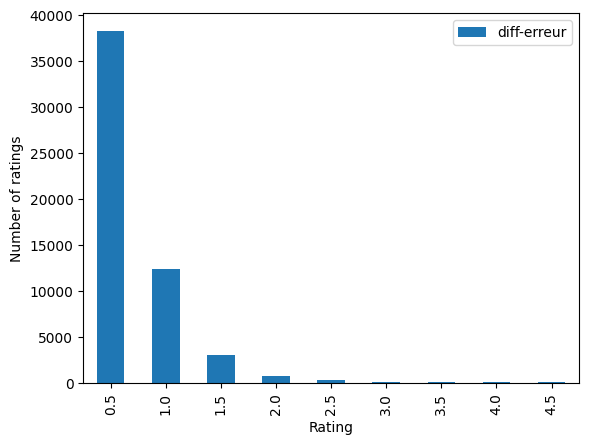

In [ ]:
note_values = pd.DataFrame()
note_values["diff-erreur"] = devbad["diff"].value_counts().sort_index()

note_values.plot(kind="bar", xlabel="Rating", ylabel="Number of ratings")
plt.show()

In [ ]:
note_values = pd.DataFrame()
note_values["difference"] = devbad["diff"].value_counts().sort_index()

note_values.plot(kind="bar", xlabel="Notes", ylabel="Nombre de notes")
plt.show()

In [ ]:
tmp = devbad[devbad["diff"] > 0.5].copy()
tmp


movie               name                   user_id  note  \
review_id                                                              
52118387   221875           bsalvert  Z20020201155528393476112   4.0   
54481065   221875      kevinsolstice  Z20090520094437697506230   4.0   
50877948   221875            Yves G.  Z20120808234208520401819   2.0   
51965038   221875           apotheme  Z20070228015331953348969   3.5   
59554554   221875           Audrey L  Z20130804141603107661268   2.0   
...           ...                ...                       ...   ...   
45444822   221892      Septième Sens  Z20130322181520883614864   1.0   
45444213   221892  Bulles de Culture  Z20140505093817713797659   3.0   
46265618   221892         DukeMARVIN  Z20090310094918520235316   2.5   
50033569   221892              ardeo  Z20050528143256553205628   1.5   
45398350   221892           jmjbest2  Z20120921184036850602472   2.0   

                                                 commentaire  diff  
review_id                                                           
52118387   Un film qui aux premières images vous ennuie p...   2.0  
54481065   "The Finest Hours" joue la carte du solide fil...   1.0  
50877948   "The Finest Hours" est inspiré d’une histoire ...   1.0  
51965038   the finest hours permet de constater que les s...   1.0  
59554554   Deux heures de Chris Pine sur fond vert... Cel...   1.0  
...                                                      ...   ...  
45444822   Charles Chaplin était un artiste, dans tous le...   1.0  
45444213   C'est grâce à un scénario rondement bien ficel...   1.0  
46265618   Manquant cruellement de rythme pour que la far...   1.0  
50033569   Venant de l'auteur de 2 des meilleurs films fr...   1.0  
45398350   Terriblement déçu par et pour le si sympathiqu...   1.5  

[16715 rows x 6 columns]

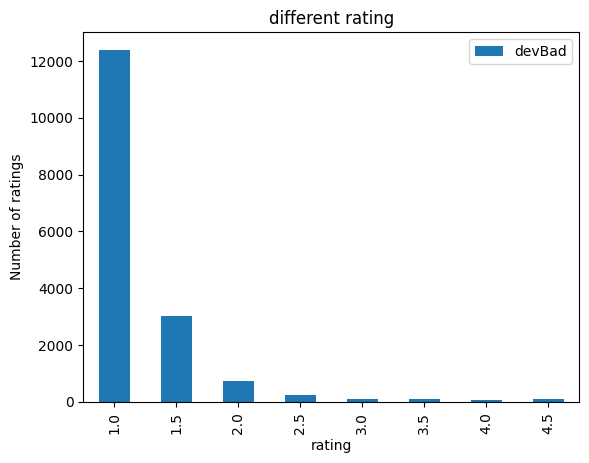

In [ ]:
note_values2 = pd.DataFrame()
note_values2["devBad"] = tmp["diff"].value_counts().sort_index()

note_values2.plot(kind="bar", title="different rating", xlabel="rating", ylabel="Number of ratings")
plt.show()

In [ ]:
tmp

movie               name                   user_id  note  \
review_id                                                              
52118387   221875           bsalvert  Z20020201155528393476112   4.0   
54481065   221875      kevinsolstice  Z20090520094437697506230   4.0   
50877948   221875            Yves G.  Z20120808234208520401819   2.0   
51965038   221875           apotheme  Z20070228015331953348969   3.5   
59554554   221875           Audrey L  Z20130804141603107661268   2.0   
...           ...                ...                       ...   ...   
45444822   221892      Septième Sens  Z20130322181520883614864   1.0   
45444213   221892  Bulles de Culture  Z20140505093817713797659   3.0   
46265618   221892         DukeMARVIN  Z20090310094918520235316   2.5   
50033569   221892              ardeo  Z20050528143256553205628   1.5   
45398350   221892           jmjbest2  Z20120921184036850602472   2.0   

                                                 commentaire  diff  
review_id                                                           
52118387   Un film qui aux premières images vous ennuie p...   2.0  
54481065   "The Finest Hours" joue la carte du solide fil...   1.0  
50877948   "The Finest Hours" est inspiré d’une histoire ...   1.0  
51965038   the finest hours permet de constater que les s...   1.0  
59554554   Deux heures de Chris Pine sur fond vert... Cel...   1.0  
...                                                      ...   ...  
45444822   Charles Chaplin était un artiste, dans tous le...   1.0  
45444213   C'est grâce à un scénario rondement bien ficel...   1.0  
46265618   Manquant cruellement de rythme pour que la far...   1.0  
50033569   Venant de l'auteur de 2 des meilleurs films fr...   1.0  
45398350   Terriblement déçu par et pour le si sympathiqu...   1.5  

[16715 rows x 6 columns]

In [ ]:
tmp["tokens"] = tmp["commentaire"].progress_apply(lambda text: \
    tokenizer.encode(text, add_special_tokens=True))

100%|██████████| 16715/16715 [00:14<00:00, 1193.92it/s]


In [ ]:
dev["tokens"] = dev["commentaire"].progress_apply(lambda text: \
    tokenizer.encode(text, add_special_tokens=True))


100%|██████████| 100400/100400 [01:14<00:00, 1347.57it/s]


In [ ]:
tmp

movie               name                   user_id  note  \
review_id                                                              
52118387   221875           bsalvert  Z20020201155528393476112   4.0   
54481065   221875      kevinsolstice  Z20090520094437697506230   4.0   
50877948   221875            Yves G.  Z20120808234208520401819   2.0   
51965038   221875           apotheme  Z20070228015331953348969   3.5   
59554554   221875           Audrey L  Z20130804141603107661268   2.0   
...           ...                ...                       ...   ...   
45444822   221892      Septième Sens  Z20130322181520883614864   1.0   
45444213   221892  Bulles de Culture  Z20140505093817713797659   3.0   
46265618   221892         DukeMARVIN  Z20090310094918520235316   2.5   
50033569   221892              ardeo  Z20050528143256553205628   1.5   
45398350   221892           jmjbest2  Z20120921184036850602472   2.0   

                                                 commentaire  diff  \
review_id                                                            
52118387   Un film qui aux premières images vous ennuie p...   2.0   
54481065   "The Finest Hours" joue la carte du solide fil...   1.0   
50877948   "The Finest Hours" est inspiré d’une histoire ...   1.0   
51965038   the finest hours permet de constater que les s...   1.0   
59554554   Deux heures de Chris Pine sur fond vert... Cel...   1.0   
...                                                      ...   ...   
45444822   Charles Chaplin était un artiste, dans tous le...   1.0   
45444213   C'est grâce à un scénario rondement bien ficel...   1.0   
46265618   Manquant cruellement de rythme pour que la far...   1.0   
50033569   Venant de l'auteur de 2 des meilleurs films fr...   1.0   
45398350   Terriblement déçu par et pour le si sympathiqu...   1.5   

                                                      tokens  
review_id                                                     
52118387   [5, 153, 492, 31, 68, 1640, 1004, 39, 21, 1694...  
54481065   [5, 87, 7374, 4498, 41, 27790, 10, 130, 1608, ...  
50877948   [5, 87, 7374, 4498, 41, 27790, 10, 130, 30, 54...  
51965038   [5, 808, 259, 41, 616, 8143, 288, 8, 4108, 27,...  
59554554   [5, 1922, 511, 8, 11130, 6589, 35, 32, 729, 17...  
...                                                      ...  
45444822   [5, 2662, 12000, 1660, 149, 23, 4494, 7, 29, 1...  
45444213   [5, 84, 11, 41, 435, 15, 23, 3949, 4724, 131, ...  
46265618   [5, 2786, 6796, 24391, 8, 2112, 24, 27, 13, 20...  
50033569   [5, 10092, 172, 8, 17, 11, 1232, 8, 118, 20, 1...  
45398350   [5, 15976, 4700, 131, 8195, 37, 14, 24, 16, 86...  

[16715 rows x 7 columns]

<AxesSubplot:xlabel='size', ylabel='rating_class'>

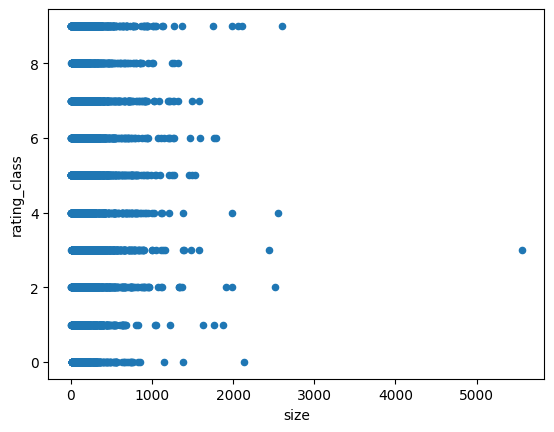

In [ ]:
accuracy_long2 = tmp

accuracy_long2["size"] = accuracy_long2["tokens"].apply(len)

# remove accuracy_long["size"] > 3000
# accuracy_long = accuracy_long[accuracy_long["size"] < 512]

accuracy_long2["rating_class"] = accuracy_long2["note"].apply(get_rating_class)

accuracy_long2.plot.scatter(x="size", y="rating_class")
# accuracy_long2

In [ ]:
accuracy_long2

movie               name                   user_id  note  \
review_id                                                              
52118387   221875           bsalvert  Z20020201155528393476112   4.0   
54481065   221875      kevinsolstice  Z20090520094437697506230   4.0   
50877948   221875            Yves G.  Z20120808234208520401819   2.0   
51965038   221875           apotheme  Z20070228015331953348969   3.5   
59554554   221875           Audrey L  Z20130804141603107661268   2.0   
...           ...                ...                       ...   ...   
45444822   221892      Septième Sens  Z20130322181520883614864   1.0   
45444213   221892  Bulles de Culture  Z20140505093817713797659   3.0   
46265618   221892         DukeMARVIN  Z20090310094918520235316   2.5   
50033569   221892              ardeo  Z20050528143256553205628   1.5   
45398350   221892           jmjbest2  Z20120921184036850602472   2.0   

                                                 commentaire  diff  \
review_id                                                            
52118387   Un film qui aux premières images vous ennuie p...   2.0   
54481065   "The Finest Hours" joue la carte du solide fil...   1.0   
50877948   "The Finest Hours" est inspiré d’une histoire ...   1.0   
51965038   the finest hours permet de constater que les s...   1.0   
59554554   Deux heures de Chris Pine sur fond vert... Cel...   1.0   
...                                                      ...   ...   
45444822   Charles Chaplin était un artiste, dans tous le...   1.0   
45444213   C'est grâce à un scénario rondement bien ficel...   1.0   
46265618   Manquant cruellement de rythme pour que la far...   1.0   
50033569   Venant de l'auteur de 2 des meilleurs films fr...   1.0   
45398350   Terriblement déçu par et pour le si sympathiqu...   1.5   

                                                      tokens  size  \
review_id                                                            
52118387   [5, 153, 492, 31, 68, 1640, 1004, 39, 21, 1694...    48   
54481065   [5, 87, 7374, 4498, 41, 27790, 10, 130, 1608, ...    85   
50877948   [5, 87, 7374, 4498, 41, 27790, 10, 130, 30, 54...   313   
51965038   [5, 808, 259, 41, 616, 8143, 288, 8, 4108, 27,...    54   
59554554   [5, 1922, 511, 8, 11130, 6589, 35, 32, 729, 17...   290   
...                                                      ...   ...   
45444822   [5, 2662, 12000, 1660, 149, 23, 4494, 7, 29, 1...   388   
45444213   [5, 84, 11, 41, 435, 15, 23, 3949, 4724, 131, ...   318   
46265618   [5, 2786, 6796, 24391, 8, 2112, 24, 27, 13, 20...    78   
50033569   [5, 10092, 172, 8, 17, 11, 1232, 8, 118, 20, 1...    96   
45398350   [5, 15976, 4700, 131, 8195, 37, 14, 24, 16, 86...    94   

           rating_class  
review_id                
52118387              7  
54481065              7  
50877948              3  
51965038              6  
59554554              3  
...                 ...  
45444822              1  
45444213              5  
46265618              4  
50033569              2  
45398350              3  

[16715 rows x 9 columns]

histograme taux d'eerue en fonction de la longeur du comentaire


(array([7.184e+03, 4.474e+03, 1.865e+03, 1.007e+03, 5.870e+02, 4.360e+02,
        2.700e+02, 1.980e+02, 1.440e+02, 1.190e+02, 6.100e+01, 6.800e+01,
        5.600e+01, 5.600e+01, 3.600e+01, 2.600e+01, 3.000e+01, 1.200e+01,
        1.400e+01, 6.000e+00, 1.000e+01, 8.000e+00, 1.000e+01, 2.000e+00,
        8.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

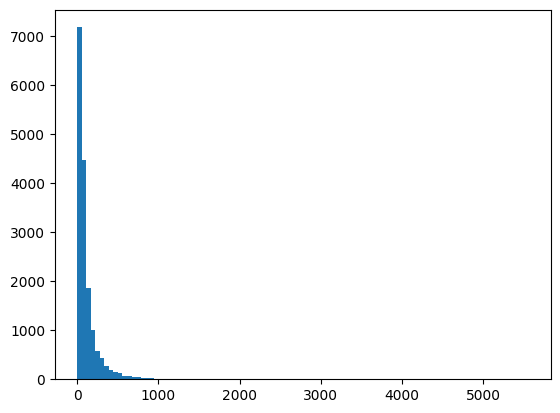

In [ ]:

plt.hist(accuracy_long2["size"], bins=100)#bins=100

# note_values3 = pd.DataFrame()
# note_values3["size"] = accuracy_long2["size"].value_counts()
# note_values3["diff"] = accuracy_long2["diff"].value_counts()

# note_values3.plot(kind="hist", x="size", y="diff")#  title="comparaison note", xlabel="Longeur du commentaire",
# plt.show() # hist

# plt.xlabel("Longeur du commentaire")
# plt.ylabel("erreur")

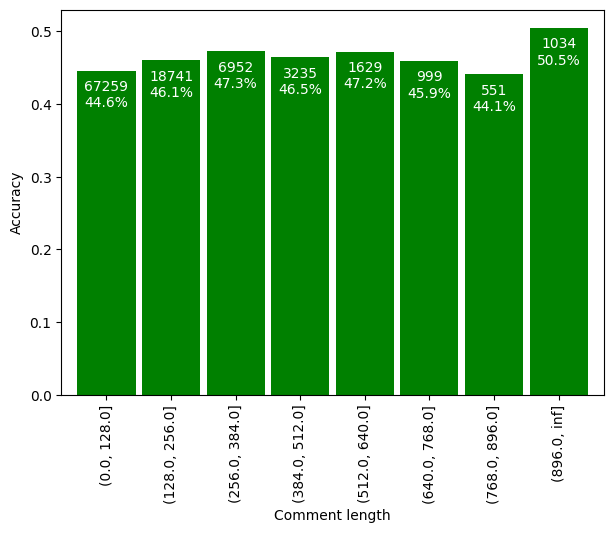

In [ ]:
# Add a bool column to the dev dataframe that indicates if the prediction is correct or not
dev["correct"] = dev["note"] == outputfile["note"]

# There are too few comments with token length > cutoff to be useful
bins = np.arange(0, 1000, 128)
# add a single bin for comments with length > cutoff
bins = np.append(bins, np.inf)

# Compute a histogram of error rates according to "correct" for each bin of comment length
dev["size"] = dev["tokens"].apply(len)
dev["size_bin"] = pd.cut(dev["size"], bins=bins)
dev.groupby("size_bin")["correct"].mean().plot(
    kind="bar",
    # title="Accuracy by comment length",
    xlabel="Comment length",
    ylabel="Accuracy",
    figsize=(7, 5),
    color="green",
    width=0.9,
)

# Annotate each bin bar with the number of comments in the bin
group = dev.groupby("size_bin")
size_groups = group["correct"].count()
accuracy_groups = group["correct"].mean()
average_diff = group["diff"].mean()
for i, v in enumerate(group["correct"].mean()):
    plt.text(i, v-0.05, f"{size_groups[i]}\n{accuracy_groups[i]:.1%}", ha="center", color="white")


faire la mêm chose avec mois de 512
type de films ? 
réalisateur ?

catégorie 
one hot des gerne -> nlp? 
gerne pusi text -> gerne : commentaire 
if categorie not existe 

In [ ]:
import emoji

tokenizer.encode(emoji.demojize("😀"))

# count emoji in all dataset
emoji_count = 0
for i, row in tqdm(tmp.iterrows(), total=tmp.shape[0]):
    emoji_count += emoji.emoji_count(tmp["commentaire"][i])

emoji_count

# emoji_count2 = 0
# for i, row in tqdm(dev.iterrows(), total=tmp.shape[0]):
#     emoji_count2 += emoji.emoji_count(dev["commentaire"][i])

# emoji_count2

ModuleNotFoundError: No module named 'emoji'

In [ ]:
# for i, row in tqdm(tmp.iterrows(), total=tmp.shape[0]):
#     if row['diff'] == 1:
#         print(row['commentaire'])
#         print(row['note'])
#         print(outputfile.loc[i].note)
#         print("-----------------------------------")

  9%|▉         | 1515/16715 [00:00<00:02, 7541.36it/s]

"The Finest Hours" joue la carte du solide film d'action bien emballé, même s'il doit en passer par quelques scènes de clichés. Mais en tant que divertissement c'est tout à fait satisfaisant (même si les histoires de marins peinent à me passionner), d'autant plus que désormais la conversion en 3D peut donner d'excellents résultats comme c'est le cas ici.
4.0
3.0
-----------------------------------
"The Finest Hours" est inspiré d’une histoire vraie : durant l’hiver 1952, une embarcation légère des gardes-côtes américains a secouru un pétrolier coupé en deux par la tempête au large du Massachussetts.  "The Finest Hours" est un film-catastrophe avec tous les passages obligés du genre : le cadre lentement posé, la tempête qui approche puis se déchaîne, la mort/le sacrifice de tel ou tel personnage secondaire (noir de préférence), le happy end. Les naufragés se déchirent en attendant la mort et les sauveteurs se surpassent en leur sauvant la vie. Mais comme dans "Titanic", on ne peut pas s

 18%|█▊        | 3071/16715 [00:00<00:01, 7374.40it/s]

Pour the rock ,il devient trop gros pour des roĺes d heros agile 🤷🏻‍♂️,c est du cinema purement comm et ca craint ,le film est un flop ....
1.5
0.5
-----------------------------------
J'ai kiffer il y a un peu moins d'humour que dans le premier je recommande à voir en famille à partir de 8 pour comprendre l'humour
4.0
5.0
-----------------------------------
Relativement doués lorsqu'ils réalisent ensemble (« Le Livre d'Eli » et surtout « From Hell »), les frères Hughes sont visiblement nettement moins bons séparés, du moins en ce qui concerne Allen. Malgré des grands airs de film politique voulant dénoncer la corruption régnant dans le milieu politique (c'est vrai que personne ne l'avait jamais fait avant), le film souffre d'un scénario souvent inintéressant et d'une réalisation totalement impersonnelle à laquelle s'ajoutent quelques tics et effets ne faisant qu'affirmer la vacuité de l'entreprise. Finalement très banal, l'œuvre n'a ainsi jamais l'envergure qu'elle cherche à déployer, 

 29%|██▉       | 4836/16715 [00:00<00:01, 7830.05it/s]

Pour un premier contact s'en est vraiment un. Plusieurs vont sûrement le rater. Une bande son impressionnante, un trio d'acteurs à la hauteur. Peu de dialogue pour un film sur la communication... il faut laisser le temps au temps...
3.5
4.5
-----------------------------------
Voici le remake d'un film peu connu (mais intéressant) de Romero et je vous le dis de suite je préfère l'original. Durant une bonne demi-heure The Crazies tient vraiment la route mais ensuite bien que quelques scènes soient réussies The Crazies ne parvient pas à se démarquer des autres productions du genre ; on ressent une grosse impression de déjà-vu et l'absence totale du côté subversif du film de Romero. Une petite déception même si je ne m'attendais pas un grand film.
2.0
3.0
-----------------------------------
Alternant sans cesse le bon (ambiance crépusculaire; quelques scènes marquantes...) et le moins bon (photo beaucoup trop sombre; le look très "infectés" des fous du titre...), un remake honorable d'un f

 44%|████▍     | 7426/16715 [00:00<00:01, 7842.50it/s]

Avec son "Expendables", Stallone réalise mine de rien le gros coup de l'été. Un retour remarquable et presque inespéré à 64 ans pour "l'action star" des années 80. Suivant les modèles de sa grande époque, Stallone réalise un film très bourrin mais jouissif car plein de second degré et de petits clins d'oeil. Le casting est très très lourd lui aussi, avec une multitude de gueules plus patibulaires les unes que les autres. M'est avis que certains autres réussissent également là un beau come-back (Dolph Lundgren notamment). Van Damme peut se mordre les doigts...
3.0
4.0
-----------------------------------
Un vrai film d'action pures années 80! Ca flingue de partout, et nom de Dieu quel casting!!!! Chapeau à Stallone pour avoir pu réunir tant de mecs qui nous ont fait vibrer ces dernières années. bien sûr, le tout est improbable, exagéré, mais toutefois assez jouissif. Un pur blockbuster.
3.0
4.0
-----------------------------------
Tout ce qu’il y avait à dire sur ce film à été dit : derri

 61%|██████    | 10232/16715 [00:01<00:00, 8287.30it/s]

Drôle, piquant, avec des références au cinéma espagnol... Super, tout simplement ! Même les adultes passent un super moment !
4.0
5.0
-----------------------------------
Très bon film d’animation, les personnages sont bien construits et attachants.  Sans rentrer dans un discours moralisateur anti-corrida, la condition animale des taureaux d’arène est décrite intelligemment dans une ambiance humoristique ! Très bon moment de partage avec mes enfants avec qui nous avons eu la chance de le voir un peu avant la sortie en salle :)
5.0
4.0
-----------------------------------
Film drôle, amusant, avec un bon rythme, sensible et qui montre une réalité et sensibilise les plus petits sur une réalité qui ne devrait plus exister: la tauromachie. Je conseille pour enfants et adultes
5.0
4.0
-----------------------------------
Allez y , les enfants ont rit de bon coeur et nous les adultes aussi !.  Un bon moment familial . Ferdinand, on t adore.  Votre site n a aucun intérêt. Quoi écrire pour publie

 72%|███████▏  | 11967/16715 [00:01<00:00, 7951.38it/s]

4.0
-----------------------------------
L’ovni du cinéma français refait surface pour nous proposer du neuf dans un milieu consanguin qui n’a pas su se renouveler. Déjanté, drôle et juste, ce film mérite son succès et devrait inciter aux autres de sortir de leurs milieux de confort.
5.0
4.0
-----------------------------------
Albert Dupontel fait du beau avec du laid dans ce film. Il nous séduit à travers cette histoire qui a une ressemblance dans le style de l'œuvre de Jean-Pierre Jeunet "Le fabuleux destin d'Amélie Poulain". Le film respire à pleins poumons d'ingéniosité et de malice. En fil conducteur, le film traite la notion de la mémoire. C'est le meilleur film francais de l'année, les actrices et acteurs y jouent très bien. En allant voir ce film, on passe un trés grand moment de cinema. C'est une très belle réussite et il faut vraiment aller le voir en salle.
4.0
5.0
-----------------------------------
Tout est là pour passer un excellent moment de cinema: - un scenario origina

 89%|████████▊ | 14817/16715 [00:01<00:00, 8974.42it/s]

J'attendais ce film ave beaucoup d'impatience, la bande annonce me donnais envie depuis des mois ! J'ai apprécier ce film  qui parle de problème actuelle et futur et nous donne un aperçu. Catastrophique de cela . Une très bonne réalisation et j'adore découvrir Johnny  Depp  dans un nouveau rôle comme celui ci
3.0
4.0
-----------------------------------
ce film n'avance pas ne le regarder surtout pas je l'attendais avec impatience et il ma decu a ne pas voir
1.5
0.5
-----------------------------------
Un magnifique film de science fiction, original sur tous les points,  superbe histoire.  Casting parfait.  Effets spéciaux réussi et pas envahissant. Ce film fait ressentir à la foi, de la peur, de la tristesse,  de l'excitation. Je les adoré.
4.0
5.0
-----------------------------------
film magnifique, l'idée est original, les acteurs nous font vraiment vivre ce changement autant effrayant par ce coté inconnu, mais auquel on veux quand meme voir le resultat parce qu'il peux exister. imagi

 99%|█████████▉| 16566/16715 [00:02<00:00, 7770.96it/s]

Techniquement c'est très réussi et même si l'esprit des BD est bien retranscrit, j'ai trouvé que le scénario s'éloignait un peu trop de l'histoire originale. Néanmoins on ne s'ennuie pas!!!
4.0
3.0
-----------------------------------
Une très bonne adaptation,fidèle à l'esprit des bd. La fusion entre les 3 albums passe bien et le scénario est très bon,malgré un rythme parfois trop rapide.Les personnages de Milou,Haddock(hilarant) et Sackharine sont les réussites du film,dommage que les Dupont apparaissent peu.La musique de John Williams est superbe mais certains thèmes restent assez discrets.Certaines scènes sont très réussites comme        spoiler:        la poursuite à Bagghar ou la bataille des pirates.    .  Un film que les fans de Tintin ne peuvent pas manquer !!!
5.0
4.0
-----------------------------------
Quelle déception ! Après un début pas mal, l'accumulation des scènes d'action devient vite soulante. Tintin a 15 ans, n'est plus Belge, Haddock devient Écossais et ça marchera 

100%|██████████| 16715/16715 [00:02<00:00, 7865.23it/s]

5.0
-----------------------------------
Première tentative de comédie de la part du réalisateur du Petit Lieutenant et Des Hommes et des dieux, La rançon de la gloire se voulait un hommage à Charles Chaplin. Un argument qui a convaincu deux des enfants du cinéaste, Dolorès et Eugène, de participer au film de Xavier Beauvois. Tout ayant déjà été dit sur la vie de Chaplin, le scénario a l’idée de revenir sur le fait divers morbide ayant eu lieu juste après sa mort : Le vol du cercueil et la demande de rançon à la famille. Dans le rôle des deux criminels, Benoit Poelvoorde et Roshdy Zem donnent à leurs personnages le profil de deux immigrés marginalisés à qui le scénariste a essayé tant bien que mal de trouver des circonstances atténuantes. Comment, à partir de ça, faire une comédie ? C’est la question que l’on se pose pendant les quatre-vingts dix minutes de ce film qui n’arrive jamais à trouver le ton juste pour traiter son sujet. La seule vraie source de légèreté dans la reconstitution

Text(0, 0.5, 'diff')

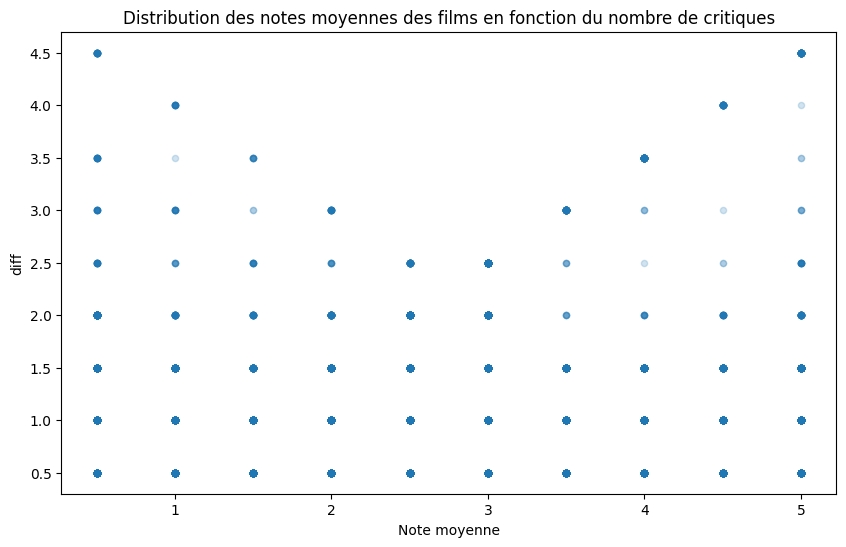

In [ ]:
bad_note_subset = devbad

# remove movies with less than 20 reviews
# film_subset = film_subset[film_subset.groupby("movie")["movie"].transform("count").ge(20)]

# Distribution of the average ratings of films according to the number of reviews
bad_note_subset.plot.scatter(y="diff", x="note", title="Distribution des notes moyennes des films en fonction du nombre de critiques", figsize=(10, 6), alpha=0.2)
plt.xlabel("Note moyenne")
plt.ylabel("diff")



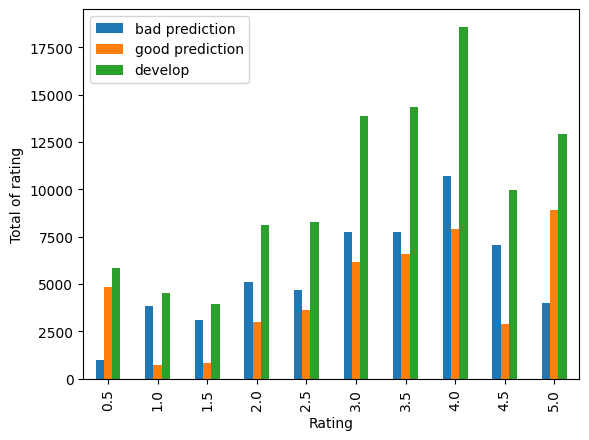

In [ ]:
note_values = pd.DataFrame()
note_values["bad prediction"] = devbad["note"].value_counts().sort_index()
note_values["good prediction"] = devGood["note"].value_counts().sort_index()
note_values["develop"] = dev["note"].value_counts().sort_index()

note_values.plot(kind="bar", xlabel="Rating", ylabel="Total of rating") # title="comparaison note",
plt.show()

In [ ]:

devGood["tokens"] = devGood["commentaire"].progress_apply(lambda text: \
    tokenizer.encode(text, add_special_tokens=True))

100%|██████████| 45422/45422 [00:34<00:00, 1311.56it/s]


<AxesSubplot:xlabel='size', ylabel='rating_class'>

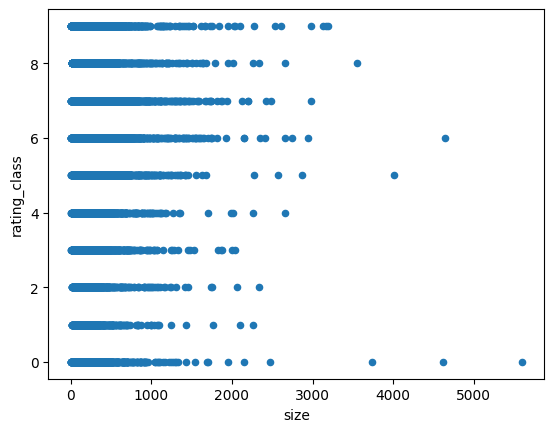

In [ ]:
accuracy_long = devGood

accuracy_long["size"] = accuracy_long["tokens"].apply(len)

#remove accuracy_long["size"] > 3000
# accuracy_long = accuracy_long[accuracy_long["size"] < 512]

accuracy_long["rating_class"] = accuracy_long["note"].apply(get_rating_class)

accuracy_long.plot.scatter(x="size", y="rating_class")


In [ ]:
import emoji

tokenizer.encode(emoji.demojize("😀"))

# count emoji in all dataset
emoji_count = 0
for i, row in tqdm(devGood.iterrows(), total=devGood.shape[0]):
    emoji_count += emoji.emoji_count(devGood["commentaire"][i])

emoji_count

emoji_count2 = 0
for i, row in tqdm(dev.iterrows(), total=devGood.shape[0]):
    emoji_count2 += emoji.emoji_count(dev["commentaire"][i])

emoji_count2

100%|██████████| 54978/54978 [00:10<00:00, 5140.18it/s]
100400it [00:19, 5106.40it/s]                          


1592

In [ ]:
import re

def Find(string):
 
    # findall() has been used
    # with valid conditions for urls in string
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex, string)
    return [x[0] for x in url]

tmp_url = 0
size_url= []
note_url = []
for i, row in tqdm(devGood.iterrows(), total=devGood.shape[0]):
    if Find(devGood["commentaire"][i]) != []:
        # print(devGood["commentaire"][i])
        size_url.append(devGood["commentaire"][i])
        note_url.append(devGood["note"][i])
        tmp_url += 1

tmp_url

tmp_url2 = 0
size_url2= []
note_url2 = []
for i, row in tqdm(dev.iterrows(), total=dev.shape[0]):
    if Find(dev["commentaire"][i]) != []:
        size_url2.append(dev["commentaire"][i])
        note_url2.append(dev["note"][i])
        tmp_url2 += 1

tmp_url2

100%|██████████| 100400/100400 [00:11<00:00, 9002.32it/s]


501

In [ ]:
print(tmp_url, tmp_url2, ((tmp_url)/tmp_url2)*100)

def Average(lst):
    sum = 0
    for i in lst:
        sum += len(i)
    return sum / len(lst)

print("avg dev",Average(size_url))
print("avg devgood",Average(size_url2))

print("min ", len(max(size_url, key=len)))
print(len(size_url[0]))

# print(note_url)

316 501 63.07385229540918
avg dev 1068.9018987341772
avg devgood 1112.88622754491
min  5663
462


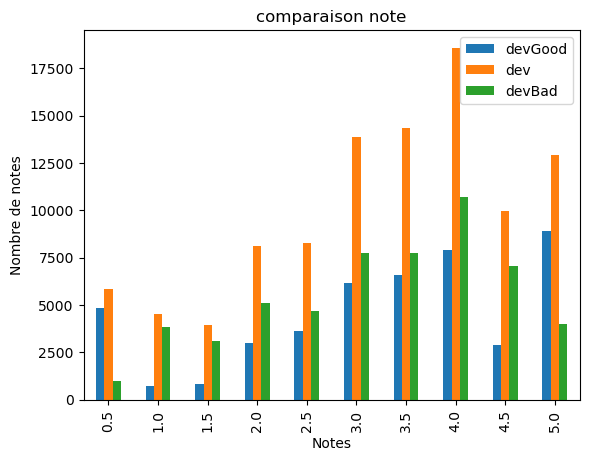

In [ ]:
note_values = pd.DataFrame()
note_values["devGood"] = devGood["note"].value_counts().sort_index()
note_values["dev"] = dev["note"].value_counts().sort_index()
note_values["devBad"] = devbad["note"].value_counts().sort_index()

note_values.plot(kind="bar", title="comparaison note", xlabel="Notes", ylabel="Nombre de notes")
plt.show()

On a du mal a prédire 1 1.5 4.5

<AxesSubplot:title={'center':'comparaison note'}, xlabel='Notes', ylabel='Nombre de notes'>

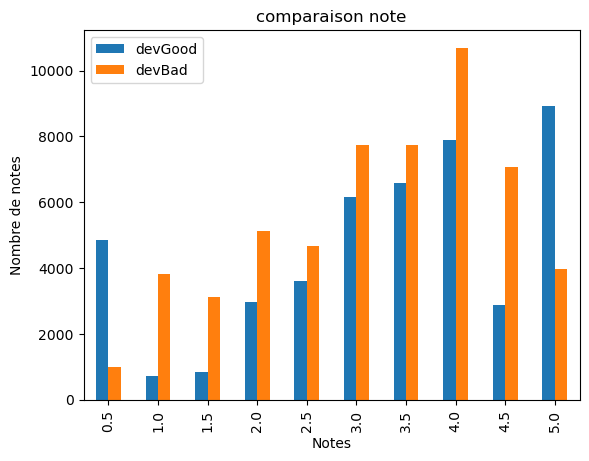

In [ ]:
# compare note in devGood and devBad
note_values = pd.DataFrame()

note_values["devGood"] = devGood["note"].value_counts().sort_index()
note_values["devBad"] = devbad["note"].value_counts().sort_index()

note_values.plot(kind="bar", title="comparaison note", xlabel="Notes", ylabel="Nombre de notes")


In [ ]:
print(devGood.loc[53015074])
print("-----------------------------------")
print(outputfile.loc[53015074])
print("-----------------------------------")
print(devGood.loc[53015074].commentaire)

movie                                                     244430
name                                                atomewarrior
user_id                                 Z20110303190024017478821
note                                                         5.0
commentaire    Un film choque, coups de poing, à la fois très...
Name: 53015074, dtype: object
-----------------------------------
review_id    review_53015074
note                     4.5
Name: 53015074, dtype: object
-----------------------------------
Un film choque, coups de poing, à la fois très réaliste et dur, qui s'attaque autant à la défaillance du système de l'éducation nationale face à la violence scolaire qu'aux persécuteurs. Et pour finir le film permet de mettre en lumière un sujet peu mis en avant, mais extrêmement grave.


Text(0, 0.5, 'Nombre de critiques')

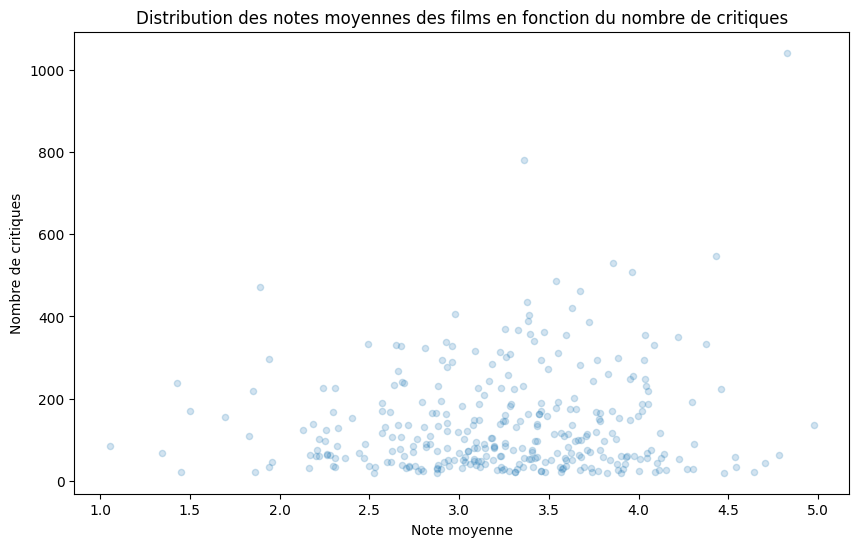

In [ ]:
# plot movies average rating against number of reviews
film_subset = devGood

# remove movies with less than 20 reviews
film_subset = film_subset[film_subset.groupby("movie")["movie"].transform("count").ge(20)]

film_subset = film_subset.groupby("movie").agg({"note": "mean", "movie": "count"})

film_subset.plot.scatter(y="movie", x="note", title="Distribution des notes moyennes des films en fonction du nombre de critiques", figsize=(10, 6), alpha=0.2)
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de critiques")

In [ ]:
print(len(devGood), emoji_count, (emoji_count/len(devGood))*100)
# emoji is not a problem
print(len(dev), emoji_count2, (emoji_count2/len(dev))*100)
print(emoji_count2-emoji_count)

54978 531 0.9658408818072682
100400 1592 1.5856573705179282
1061


on aurais des probléme sur les class en .5

faire la moyenne des 2 score entre 2 512 tokens entre le début et la fin, overlap entre les 2

essaie de prédirt la note est non les classe et descritisé 

consiell presnetation:

intro -> presenter la tache 
c'est de l'analyse de sentiment, avec 3 exmple (positif, negatif neutre, les 3 classes)
presenter le corpus -> c'ets tire de allocine, des info generale taille ...
on part du principe que train et dev on la même taille 
presneter notre solution -> camenbert plus réseau de neuraux
expliquer nos choix avec un appier sur des chiffre
presenter les metric -> les metric utiliser, rapelle , light mesure 
expliquer la topologie du réseau de neuraux, camabert -> expliquer la méthode
(expliquer les prétratement)
expliquer les résultat 
expliuqer le leaderboard

slide 1 pretraitment 
slide 2 systeme

conclution -> voila se que l'on appris, evaluer le projet selon leaderboard


pour l'article -> doit etre dans l'idée capable de reprodurie le systeem
1 introdution -> quelle est la tache 
2 prenseter donnée ?
3 systeme, presnter le systeme
4 résultat -> 
5 concultion

Text(0, 0.5, 'Number of reviews')

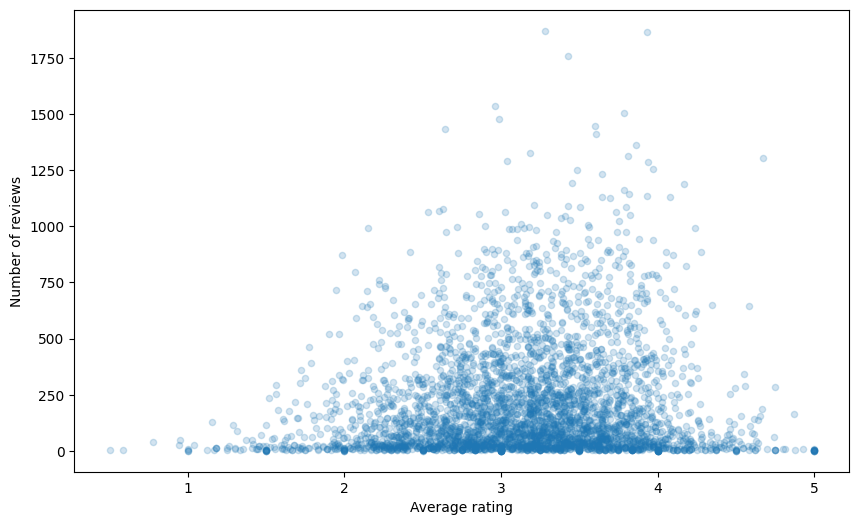

In [ ]:
# plot movies average rating against number of reviews
film_subset = pd.concat([train, dev])

# remove movies with less than 20 reviews
# film_subset = film_subset[film_subset.groupby("movie")["movie"].transform("count").ge(20)]

film_subset = film_subset.groupby("movie").agg({"note": "mean", "movie": "count"})
#, title="Distribution des notes moyennes des films en fonction du nombre de critiques"
film_subset.plot.scatter(y="movie", x="note", figsize=(10, 6), alpha=0.2)
plt.xlabel("Average rating")
plt.ylabel("Number of reviews")

In [ ]:
# plot movies average rating against number of reviews
film_subset = pd.concat([train, dev])

film_subset["length"] = film_subset["commentaire"].apply(lambda x: len(x))
# remove movies with less than 20 reviews
# film_subset = film_subset[film_subset.groupby("movie")["movie"].transform("count").ge(20)]

film_subset = film_subset.groupby("length").agg({"note": "", "length": "count"})
#, title="Distribution des notes moyennes des films en fonction du nombre de critiques"
film_subset.plot.scatter(y="length", x="note", figsize=(10, 6), alpha=0.2)
plt.xlabel("Average rating")
plt.ylabel("Number of reviews")

AttributeError: 'SeriesGroupBy' object has no attribute ''

In [ ]:
traindev = pd.concat([train, dev])

# traindev["lenght"] = traindev["commentaire"].apply(lambda x: len(x))

traindev["tokens"] = traindev["commentaire"].progress_apply(lambda text: tokenizer.encode(text, add_special_tokens=True))
traindev


100%|██████████| 766362/766362 [08:32<00:00, 1496.14it/s]


movie               name                   user_id  note  \
review_id                                                               
58145147    229864               AM11  Z20051105131449940367618   4.0   
59303833    229864  this is my movies  Z20051220181957240298347   3.5   
61916672    229864         Shephard69  Z20121226180301760912584   4.5   
1000190786  229864              Tayop  Z20121022182542230468657   3.0   
59207755    229864             ned123  Z20061211223247607682175   3.5   
...            ...                ...                       ...   ...   
59620693    221892           Fabio C.  Z20151005194626740254489   3.0   
47495619    221892         Bernard L.  Z20150226232126323734384   2.5   
45417182    221892            montezy  Z20100224224417197559762   4.0   
1002780563  221892            Eric L.  Z20160616161509357189631   0.5   
45412505    221892      Emmanuelle D.  Z20150111190802490303521   0.5   

                                                  commentaire  length  class  \
review_id                                                                      
58145147    "Ce n'est pas ce qui se trouve en face de vous...  1186.0    7.0   
59303833    (...) En soi, je n'ai rien contre ce genre de ...  3846.0    6.0   
61916672    Pour sa troisième réalisation après "Tron, l'h...  1063.0    8.0   
1000190786  Joseph Kosinski offre de nouvelles images ébou...   261.0    5.0   
59207755    J'ai vu un film... qui traite d'un drame humai...   878.0    6.0   
...                                                       ...     ...    ...   
59620693    Après Le Petit Lieutenant et des Hommes et des...     NaN    NaN   
47495619    Dommage :  Des scènes qui traînent en longueur...     NaN    NaN   
45417182    un film lent et poétique....à l'heure ou tout ...     NaN    NaN   
1002780563  Quand Une Musique de film  plombe le film.  To...     NaN    NaN   
45412505    Ce film est pour moi très decevant et terrible...     NaN    NaN   

            diff                                             tokens  
review_id                                                            
58145147     NaN  [5, 87, 4425, 49, 11, 41, 34, 44, 31, 48, 396,...  
59303833     NaN  [5, 1583, 107, 1205, 7, 50, 49, 11, 73, 254, 1...  
61916672     NaN  [5, 123, 77, 1390, 1609, 182, 87, 412, 1944, 7...  
1000190786   NaN  [5, 4950, 3114, 10, 29156, 628, 8, 588, 1004, ...  
59207755     NaN  [5, 121, 11, 73, 380, 23, 492, 57, 31, 5557, 1...  
...          ...                                                ...  
59620693     0.0  [5, 407, 54, 2233, 31029, 14, 20, 5813, 14, 20...  
47495619     0.5  [5, 11335, 43, 363, 4938, 31, 14314, 113, 22, ...  
45417182     0.5  [5, 23, 492, 16, 113, 14, 7440, 9, 57, 169, 17...  
1002780563   0.0  [5, 877, 180, 7111, 8, 492, 7626, 35, 16, 492,...  
45412505     0.5  [5, 148, 492, 30, 24, 202, 95, 8, 291, 4306, 1...  

[766362 rows x 9 columns]

In [ ]:
traindev

note  tokens
tokens              
30909      1       1
34783      1       1
44207      1       1
63395      1       1
67008      1       1
74241      1       1
88809      1       1
107984     1       1
111776     1       1
143250     1       1

In [ ]:
# remove movies with less than 20 reviews
# film_subset2 = film_subset2[film_subset2.groupby("movie")["movie"]] # .transform("count").ge(20)

traindev = traindev.groupby("tokens").agg({"note": "count", "tokens": "count"})

traindev.plot.scatter(y="note", x="tokens", title="Distribution des notes moyennes des films en fonction du nombre de critiques", figsize=(10, 6), alpha=0.2)
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de critiques")

ValueError: 'tokens' is both an index level and a column label, which is ambiguous.